In [150]:
import os
import random

from matplotlib.image import imread 
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import optimizers

import pandas as pd

simple_path = "C://Users//sergi//Desktop//Fruits"

files = os.listdir(simple_path) # Find all the files in the directory
mix_path = simple_path + "//" + files[1] 
files = os.listdir(mix_path)
mix_path = mix_path + "//" + files[0] 
files = os.listdir(mix_path)
mix_path = mix_path + "//" + files[5]  # Training folder 

fruits_list = []
trainable_fruits = os.listdir(mix_path) # All the fruits folders, let's select 

for i in range(0,120,50):
    fruits_list.append(trainable_fruits[i])
print("Loaded fruits:",fruits_list)


Loaded fruits: ['Apple Braeburn', 'Kaki', 'Potato Red Washed']


In [151]:
# Load all the images and check size and nº.
Images = []

for path in fruits_list: # Select the path for each fruit
    actual_path = mix_path + "//" + path # Select each path
    print("Total images for",path,"training:", len(os.listdir(actual_path)))

Total images for Apple Braeburn training: 492
Total images for Kaki training: 490
Total images for Potato Red Washed training: 453


In [152]:
# There's different amount of images for each folder, do not forget it. Let's load the images

for path in fruits_list:
    actual_path = mix_path + "//" + path
    for image in os.listdir(actual_path): # Accessing the images (one folder per loop)
        actual_image = imread(actual_path + "//" + image) # Loading the image
        #It's necessary to develop a partial algorithm to load the "label"
        if (path == fruits_list[0]): 
            attach = [actual_image,1]
        else:
            attach = [actual_image,0]
        Images.append(attach) # Appending images
print(len(Images))

1435


In [153]:
# Now images have been "loaded" with the corresponding data. Let's shuffle them in order to improve the system
random.shuffle(Images)

'''
Now the images have been shuffled, Split the data into X (data) and Y (labels) to have the input data in the proper mode.
'''
X_training = []
Y_training = []
for block in Images:
    X_training.append(block[0])
    Y_training.append(block[1])

'''
Now data is splitted, let's select all test images.
'''

files = os.listdir(simple_path) # Find all the files in the directory
mix_path = simple_path + "//" + files[1] 
files = os.listdir(mix_path)
mix_path = mix_path + "//" + files[0] 
files = os.listdir(mix_path)
mix_path = mix_path + "//" + files[3]  # Training folder 

fruits_list2 = fruits_list
testing_Images = []
test_fruits = os.listdir(mix_path) # All the fruits folders, let's select 

In [154]:
# Check sizes in order to get an idea of how many images for testing we have.
for i in fruits_list2:
    actual_path = mix_path + "//" + i
    print("Nº of",i,"images:",len(os.listdir(actual_path)))

Nº of Apple Braeburn images: 164
Nº of Kaki images: 166
Nº of Potato Red Washed images: 151


In [155]:
'''
Overall, there's about a 1/3 of images for testing. Let's label each of them following the same procedure as previously in order
to provide the validation % testing data.
'''
for fruit in fruits_list2:
    actual_path = mix_path + "//" + fruit # Actual path
    for image in os.listdir(actual_path): # Passing through all images, we're in the folder. "load" image and store it
        actual_image = imread(actual_path + "//" + image)
        # Coding labels
        if fruit == fruits_list2[0]: # In case it's an apple
            value = [actual_image, 1]
        else:
            value = [actual_image, 0]
        testing_Images.append(value)


In [156]:
# Split the testing/validation dataset
X_testing = []
Y_testing = []
for value in testing_Images:
    X_testing.append(value[0])
    Y_testing.append(value[1])

    
# Time to reshape the input data (both X training and testing) to a 4D array (such as tensor).We'll also define input shapes
X = X_training[0].shape[0]
Y = X_training[0].shape[1]
D = X_training[0].shape[2]


'''
1- Checking input shapes - all images are 100x100x3. Transformed to numpy array for reshaping.
'''
X_training = np.array(X_training).reshape(len(X_training),X,Y,D)
X_testing = np.array(X_testing).reshape(len(X_testing),X,Y,D)

Y_training = np.array(Y_training)
Y_testing = np.array(Y_testing)

In [157]:
# Final steps: Create the model, train it, and testing it
import tensorflow as tf
from tensorflow import keras

# First model
f_model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [X,Y,D]),
        keras.layers.Dense("64", activation = "relu"),
        keras.layers.Dense("24", activation = "relu"),
        keras.layers.Dense("16", activation = "relu"),
        keras.layers.Dense("1", activation = "sigmoid") # As long as it's a single neuron
])

# Having a look into specifications
f_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                1920064   
_________________________________________________________________
dense_37 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 1,922,041
Trainable params: 1,922,041
Non-trainable params: 0
_________________________________________________________________


In [158]:
sgd = optimizers.SGD(lr=0.02) #SGD optimizer, parameterizable 

adam = optimizers.Adam(learning_rate=0.0001)

f_model.compile(loss='binary_crossentropy',
              optimizer=adam, # Try out sgd to visualize the performance.
              metrics = ["accuracy"])

# Adam optimizer performs way better, giving a 98% of accuracy but a huge loss value.
# Used binary crossentropy as long as we're doing a binary classifier.

f_model.fit(X_training, Y_training, epochs = 5, validation_data = (X_testing, Y_testing))

Train on 1435 samples, validate on 481 samples
Epoch 1/5
1435/1435 [==============================] - 3s 2ms/sample - loss: 6.6068 - accuracy: 0.9178 - val_loss: 1.0535 - val_accuracy: 0.9480
Epoch 2/5
1435/1435 [==============================] - 2s 1ms/sample - loss: 5.0863e-15 - accuracy: 1.0000 - val_loss: 1.7118 - val_accuracy: 0.9335
Epoch 3/5
1435/1435 [==============================] - 2s 1ms/sample - loss: 9.6557e-15 - accuracy: 1.0000 - val_loss: 1.7199 - val_accuracy: 0.9335
Epoch 4/5
1435/1435 [==============================] - 1s 837us/sample - loss: 9.6556e-15 - accuracy: 1.0000 - val_loss: 1.7199 - val_accuracy: 0.9335
Epoch 5/5
1435/1435 [==============================] - 1s 943us/sample - loss: 9.6558e-15 - accuracy: 1.0000 - val_loss: 1.7199 - val_accuracy: 0.9335


In [159]:
'''
Values converge too quick, might represent some issues as long as there are few images to "learn", for example, using MNIST
fashion dataset we'll have 70.000 images for 10 classes, overall 7000 images for each class. 
In this system we obtain significantly less images with 3 channels and 4 times bigger.
'''

'\nValues converge too quick, might represent some issues as long as there are few images to "learn", for example, using MNIST\nfashion dataset we\'ll have 70.000 images for 10 classes, overall 7000 images for each class. \nIn this system we obtain significantly less images with 3 channels and 4 times bigger.\n'

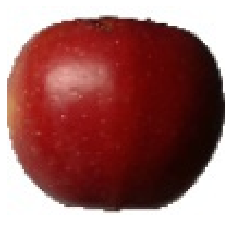

1 - apple


In [160]:
# Time to test the system and see how it performs!
fruit = os.listdir(mix_path)[0]
fruit_path = mix_path + "//" + fruit
images_list = os.listdir(fruit_path)

image = imread(fruit_path + "//" + images_list[30]) # Select the 30th image from the folder
plt.axis("off")
plt.imshow(image)
plt.show()

values = ["not an apple", "apple"]

image2 = np.array(image).reshape(1,100,100,3)
predicted = int(f_model.predict(image2))
print(predicted,"-",values[predicted])

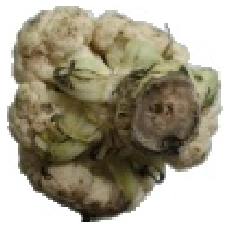

0 - not an apple


In [161]:
fruit = os.listdir(mix_path)[25]
fruit_path = mix_path + "//" + fruit
images_list = os.listdir(fruit_path)

image = imread(fruit_path + "//" + images_list[150])
plt.axis("off")
plt.imshow(image)
plt.show()

image2 = np.array(image).reshape(1,100,100,3)
predicted = int(f_model.predict(image2))
print(predicted, "-",values[predicted])

In [162]:
# Let's try out an example from the testing dataset we prepared previously
test = np.array(testing_Images[0][0]).reshape(1,100,100,3)
predicted = int(f_model.predict(test))
print(predicted, values[predicted])
print("Real label:", testing_Images[0][1])

1 apple
Real label: 1


In [163]:
# Let's predict all apples and extract statistical information "manually" just predicting all and checking how many are wrong
prediction = []
apple_path = mix_path + "//" + os.listdir(mix_path)[0]
images = os.listdir(apple_path)
for image in images:
    actual_image = imread(apple_path + "//" + image)
    actual_image = np.array(actual_image).reshape(1,100,100,3)
    prediction.append(f_model.predict(actual_image))
    
prediction = np.array(prediction)
# Extracting the amount of 0 and 1
prediction_ok = np.count_nonzero(prediction >= 0.99)
prediction_nok = np.count_nonzero(prediction < 0.99)
print("Real accuracy based in classify apples:",((prediction_ok)/len(prediction)))

Real accuracy based in classify apples: 0.7865853658536586


In [164]:
prediction2 = []
cf = os.listdir(mix_path)[25]
cf_path = mix_path + "//" + fruit
images_list = os.listdir(cf_path)
for image in images_list:
    actual_image = imread(cf_path + "//" + image)
    actual_image = np.array(actual_image).reshape(1,100,100,3)
    prediction2.append(f_model.predict(actual_image))
    
prediction2 = np.array(prediction2)
prediction_ok = np.count_nonzero(prediction2 <= 0.01)
prediction_nok = np.count_nonzero(prediction2 >= 0.01)
print("Real accuracy classifying other fruits:", ((prediction_ok)/len(prediction2)))

Real accuracy classifying other fruits: 1.0


In [165]:
'''
83.5% accuracy classifying apples using 128-32-16-1 neurons in the respective layers.
85.3% accuracy classifying apples using 64-32-16-1 neurons in the respective layers.
87.8% accuracy classifying apples using 64-24-16-1 neurons in the respective layers.

None of the cauliflowers are classified as apples!

Although it's quite good performance based in simple neurons, keep in mind the fact binary classifiers shall need the same
amount of samples for 1 and 0 classification. In this case, it's about 25% and performs closely to 90% accuracy.
If we respected this proportion, results would increase!
'''

"\n83.5% accuracy classifying apples using 128-32-16-1 neurons in the respective layers.\n85.3% accuracy classifying apples using 64-32-16-1 neurons in the respective layers.\n87.8% accuracy classifying apples using 64-24-16-1 neurons in the respective layers.\n\nNone of the cauliflowers are classified as apples!\n\nAlthough it's quite good performance based in simple neurons, keep in mind the fact binary classifiers shall need the same\namount of samples for 1 and 0 classification. In this case, it's about 25% and performs closely to 90% accuracy.\nIf we respected this proportion, results would increase!\n"